# The IMDB dataset

You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet
Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing,
each set consisting of 50% negative and 50% positive reviews.

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. **It has already been
preprocessed: the reviews (sequences of words) have been turned into sequences of integers**,
where each integer stands for a specific word in a dictionary.

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## The argument num_words=10000 means you’ll only keep the top 10,000 most frequently
## occurring words in the training data. Rare words will be discarded. This allows you to work with
## vector data of manageable size. If we didn’t set this limit, we’d be working with 88,585 unique
## words in the training data, which is unnecessarily large. Many of these words only occur in a
## single sample, and thus can’t be meaningfully used for classification.

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[11]
## The variables train_data and test_data are lists of reviews; each review is a list of word
## indices (encoding a sequence of words).

[1,
 54,
 13,
 1610,
 14,
 20,
 13,
 69,
 55,
 364,
 1398,
 21,
 54,
 13,
 219,
 12,
 13,
 1706,
 15,
 4,
 20,
 16,
 329,
 6,
 176,
 329,
 74,
 51,
 13,
 873,
 4,
 156,
 71,
 78,
 4,
 7412,
 322,
 16,
 31,
 7,
 4,
 249,
 4,
 65,
 16,
 38,
 379,
 12,
 100,
 157,
 18,
 6,
 910,
 20,
 549,
 18,
 4,
 1496,
 21,
 14,
 31,
 9,
 24,
 6,
 212,
 12,
 9,
 6,
 1322,
 991,
 7,
 3002,
 4,
 425,
 9,
 73,
 2218,
 549,
 18,
 31,
 155,
 36,
 100,
 763,
 379,
 20,
 103,
 351,
 5308,
 13,
 202,
 12,
 2241,
 5,
 6,
 320,
 46,
 7,
 457]

In [ ]:
train_labels[11]
# train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

0

In [ ]:
word_index = imdb.get_word_index() #word_index is a dictionary mapping words to an integer index.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #mapping integer indices to words


1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
reverse_word_index[51]

'when'

In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i, '?') for i in train_data[11]])
decoded_review
# Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are
# reserved indices for 'padding', 'start of sequence', and 'unknown.'.

'the no was personality as on was me time along exception not no was least that was station for of on with read is quite read been when was nature of before than do of hinted war with by br of sure of their with her perhaps that after another but is badly on type but of confusing not as by it his is must that it is producer return br stylish of white it much combination type but by 10 from after release perhaps on watch performances andre was own that breaking to is star some br already'

In [ ]:
len(train_data[10])

450

## Preparing the data

You can’t directly feed lists of integers into a neural network. They have all different lengths, but
a neural network expects to process contiguous batches of data. You have to turn your lists into
tensors.

 * Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, 1), and then use it as the first layer in your model a layer capable of handling such integer tensors.
 * **BOW (One hot encoding)** your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use as the first layer in your model a Dense layer, capable of handling floating-point vector data.

## One-hot encoding

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))

    # Sets specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[11]

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Building your model

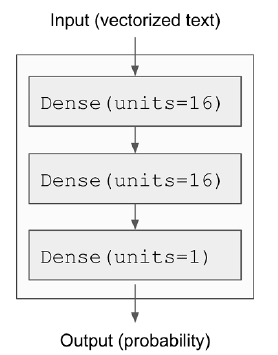

In [ ]:
#activation Functions:relu, sigmoid
#loss: binary_crossentropy
#optimizer: rmsprop
#training, testing dataset.
#validation dataset? yes, separe 10000 training examples from training.
#epochs: 10
#minibatch: 512

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5341 - accuracy: 0.7833 - val_loss: 0.4244 - val_accuracy: 0.8470
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3373 - accuracy: 0.8949 - val_loss: 0.3400 - val_accuracy: 0.8716
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2547 - accuracy: 0.9181 - val_loss: 0.2889 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2013 - accuracy: 0.9353 - val_loss: 0.3090 - val_accuracy: 0.8737
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1705 - accuracy: 0.9451 - val_loss: 0.2839 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1419 - accuracy: 0.9557 - val_loss: 0.2934 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1233 - accuracy: 0.9635 - val_loss: 0.2950 - val_accuracy: 0.8822
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

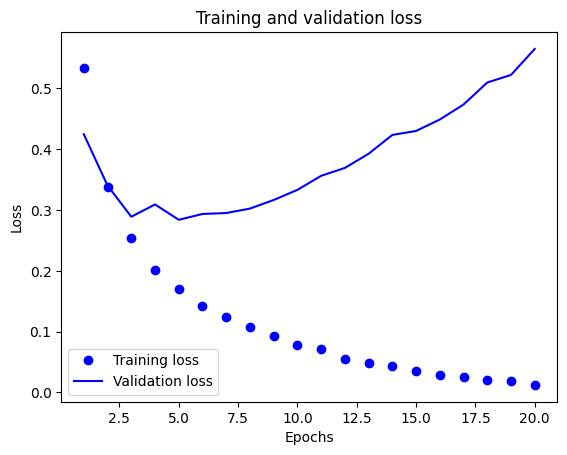

In [ ]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


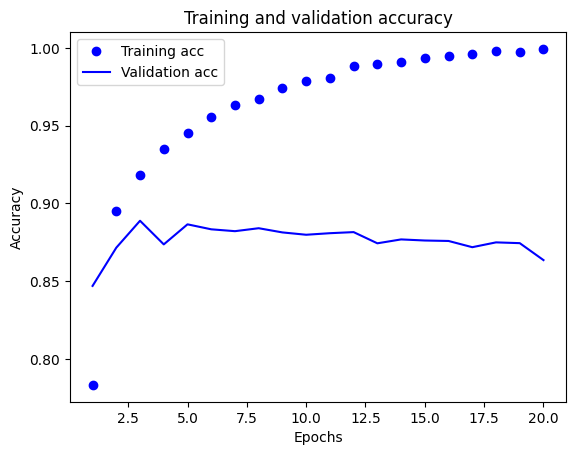

In [ ]:
# Plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)


782/782 [==============================] - 1s 1ms/step - loss: 0.6175 - accuracy: 0.8549


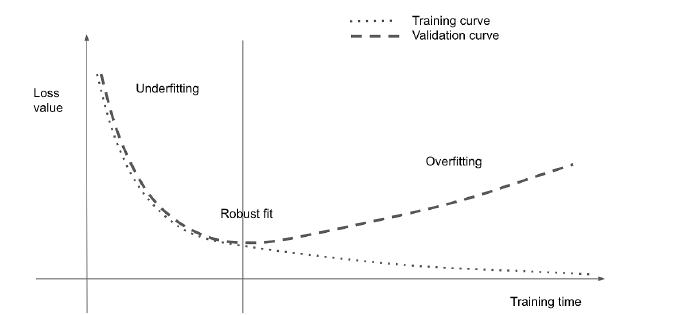

In [ ]:
## Answer the following questions:
# When the model starts to do overfitting?
# You used two dense layers before the final classification layer. Try using one or three layers, and see how doing so affects validation and test accuracy.
# Try using layers with more units or fewer units: 32 units, 64 units, and so on.
# Reduce the vocab size to 1000, and test the best architecture so far.

In [ ]:
# Evitando el overfitting y entrenando con el dataset total.

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4568 - accuracy: 0.8180
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2663 - accuracy: 0.9043
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2084 - accuracy: 0.9236
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3152 - accuracy: 0.8740
